### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from scipy.io import arff
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Missing Values

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

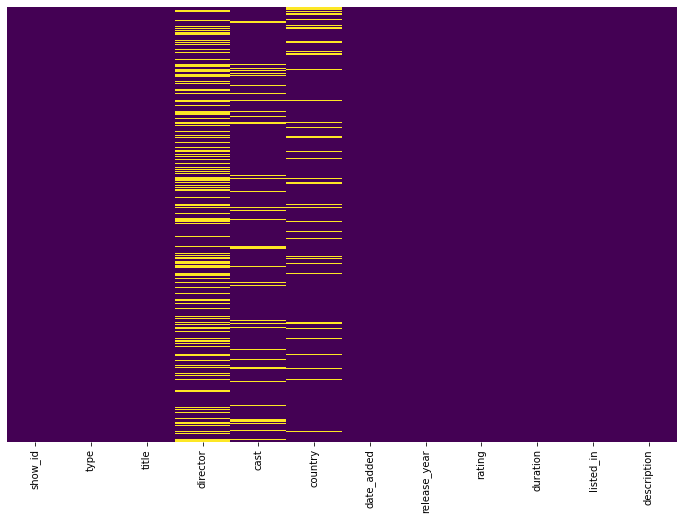

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

<AxesSubplot:xlabel='type', ylabel='count'>

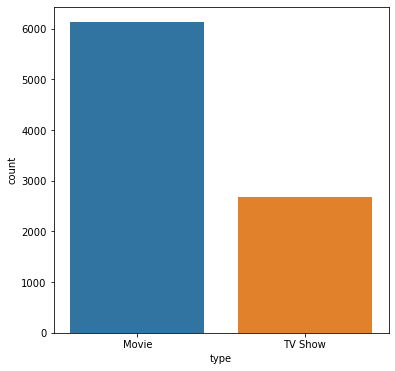

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(df['type'])

In [8]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

<AxesSubplot:xlabel='rating', ylabel='count'>

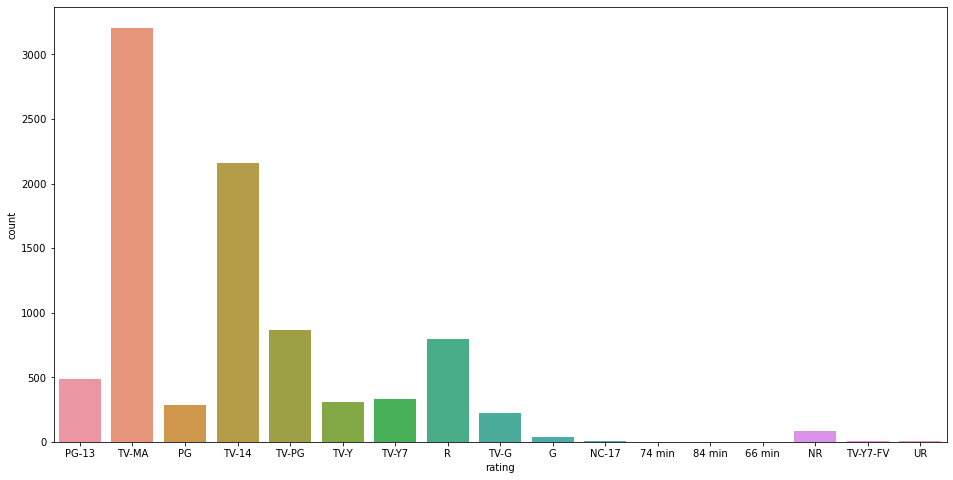

In [9]:
plt.figure(figsize=(16,8))
sns.countplot(df['rating'])

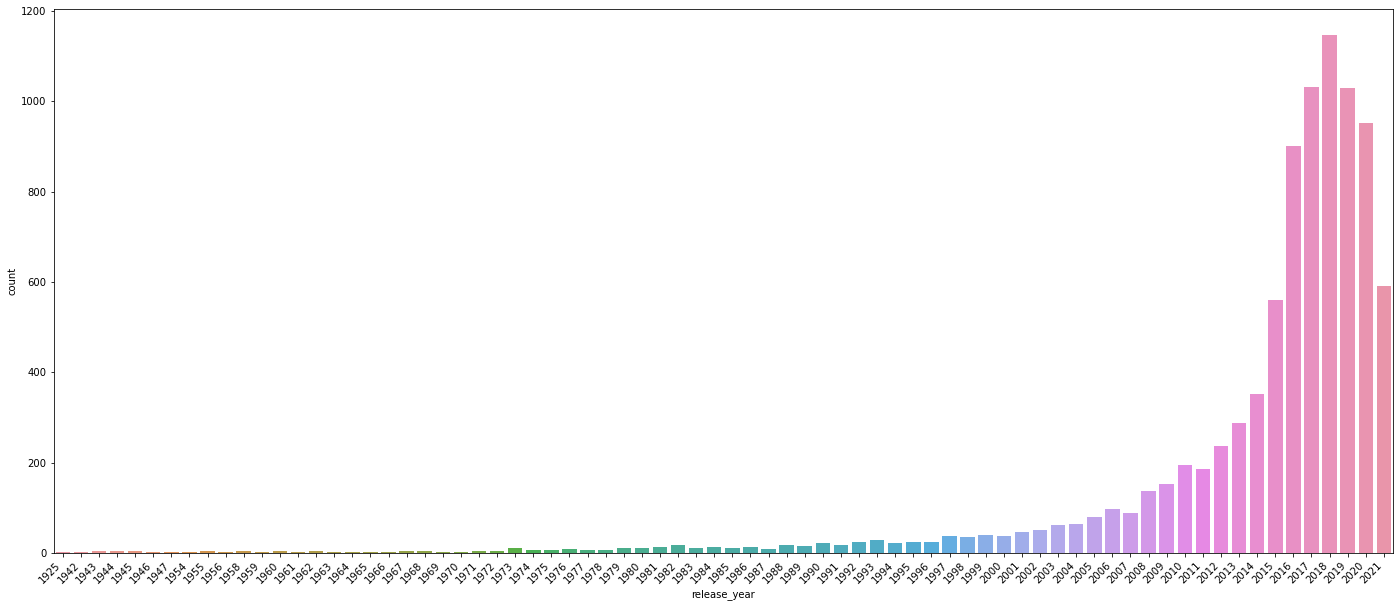

In [10]:
plt.figure(figsize=(24,10))
ax = sns.countplot(df['release_year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [11]:
df_movie = df[df['type']=='Movie'].groupby('release_year').count()
df_tv = df[df['type']=='TV Show'].groupby('release_year').count()

df_movie.reset_index(level=0, inplace=True)
df_tv.reset_index(level=0, inplace=True)

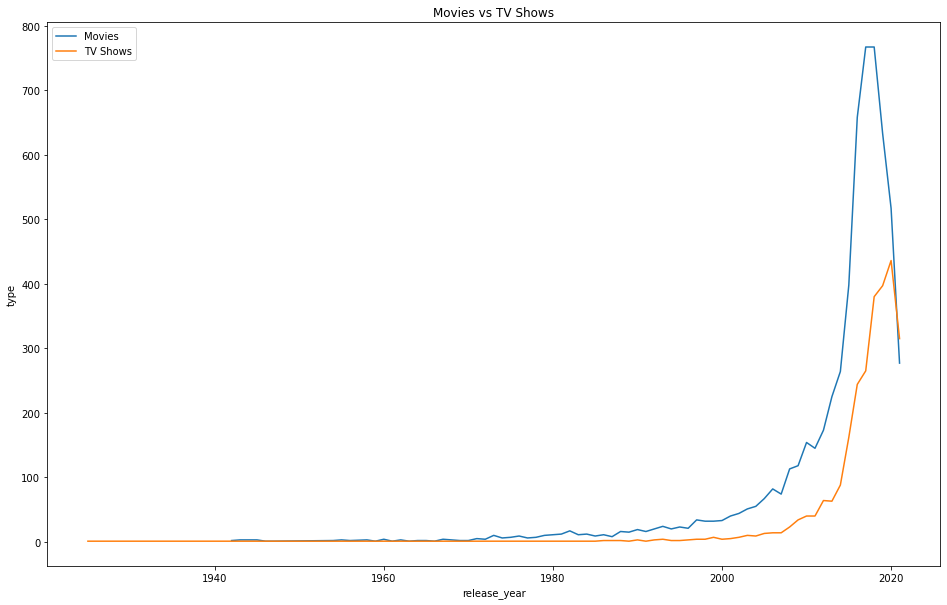

In [12]:
plt.figure(figsize=(16,10))
sns.lineplot(df_movie['release_year'], y=df_movie['type'])
sns.lineplot(df_tv['release_year'], y=df_tv['type'])
plt.title("Movies vs TV Shows")
plt.legend(['Movies', 'TV Shows'])

In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
df.drop(['show_id'], axis=1, inplace=True)

In [15]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

### Dropping a few rows containing NULL values

In [18]:
df = df[df["date_added"].notna()]
df = df[df["duration"].notna()]

In [19]:
df.isnull().sum()

type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

### Adding new columns

In [20]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])

df['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [21]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])

df['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

In [22]:
df.drop('date_added', axis='columns', inplace=True)

In [23]:
cols = [col for col in df.columns if col]
cols.append('rating')
cols

['type',
 'title',
 'director',
 'cast',
 'country',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'year_added',
 'month_added',
 'rating']

### Label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()

In [25]:
for col in cols:
    df[col] = lenc.fit_transform(df[col])

### Splitting the dataset

In [26]:
X = df.drop(['rating'], axis=1)
y = df['rating']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Filling Missing values

In [28]:
X_train["country"] = X_train["country"].fillna(X_train["country"].mode()[0])

X_train["director"] =X_train["director"].fillna('Unknown')
X_train["cast"] = X_train["cast"].fillna('Unknown')

In [29]:
y_train = y_train.fillna(y_train.mode()[0])

In [30]:
X_test["country"] = X_test["country"].fillna(X_test["country"].mode()[0])

X_test["director"] =X_test["director"].fillna('Unknown')
X_test["cast"] = X_test["cast"].fillna('Unknown')

In [31]:
y_test = y_test.fillna(y_test.mode()[0])

In [32]:
X_train.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [33]:
X_train.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [34]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0


In [35]:
X_train.head()

,type,title,director,cast,country,release_year,duration,listed_in,description,year_added,month_added
1090,0,6556,309,722,272,72,194,328,1900,13,1
1986,0,5008,3810,5244,748,66,46,374,2548,12,12
3626,0,4622,1223,1868,354,69,199,128,1905,11,2
4443,0,3230,3676,3111,251,64,62,218,7211,10,10
3429,0,2534,570,6273,603,71,3,512,1867,11,11


### Standard scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, max_features='sqrt', random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Accuracy

In [41]:
print("Accuracy : ", round(accuracy_score(y_test, y_pred)*100, 2))

Accuracy :  54.86


In [42]:
print("Confusion Matrix")
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report")
print('\n')
print(classification_report(y_test, y_pred))

Confusion Matrix


[[  1   0   2   0   1   0   0   1   1   0   0   0   0]
 [  0   1   0   0   0   1   0   9   1   0   0   0   0]
 [  0   0  37   3  10   4   0   6   0   1   1   0   0]
 [  0   0   1  32  38   5   0  24   1   0   0   0   0]
 [  0   0   1  17  90   9   0  54   0   0   0   0   0]
 [  0   1   1   0   6 208   0 190  15   0   1   0   0]
 [  0   0   1   0   0   9   1  16   2   7   5   0   0]
 [  0   0   0   6  18 121   0 502   4   1   1   0   0]
 [  0   0   6   0   2  58   1  74  24   4   1   0   0]
 [  0   0   3   0   0   0   0   3   3  30   8   0   0]
 [  0   0   3   0   0   4   0   7   0  18  39   0   0]
 [  0   0   0   0   0   0   0   1   0   0   1   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0]]


Classification Report


              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           2       0.50      0.08      0.14        12
           3       0.67      0.60      0.63        62
           4       0.5

### XGBoost Classifier

In [43]:
from xgboost import XGBClassifier

In [44]:
model_xgb = XGBClassifier(eval_metric='error')

model_xgb.fit(X_train, y_train)

y_pred_boost = model_xgb.predict(X_test)

### Accuracy

In [45]:
print("Accuracy : ", round(accuracy_score(y_test, y_pred_boost)*100, 2))

Accuracy :  54.41


In [46]:
print("Confusion Matrix")
print('\n')
print(confusion_matrix(y_test, y_pred_boost))
print('\n')
print("Classification Report")
print('\n')
print(classification_report(y_test, y_pred_boost))

Confusion Matrix


[[  1   0   2   0   1   1   1   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  11   0   0   0   0   0]
 [  2   0  34   3  11   3   1   5   2   0   1   0   0]
 [  0   0   2  31  42   4   0  19   3   0   0   0   0]
 [  0   0   0  27  91   6   0  45   2   0   0   0   0]
 [  0   0   1   3   5 212   0 182  19   0   0   0   0]
 [  0   0   0   0   0   7   4  15   6   5   4   0   0]
 [  0   1   0   3  22 133   1 482  10   1   0   0   0]
 [  0   1   6   1   1  68   5  54  29   4   1   0   0]
 [  1   0   1   0   0   0   0   0   1  32  12   0   0]
 [  0   0   3   0   0   2   1   4   3  17  41   0   0]
 [  0   0   0   0   0   1   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0]]


Classification Report


              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           2       0.00      0.00      0.00        12
           3       0.69      0.55      0.61        62
           4       0.4